In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from pandas.plotting import scatter_matrix

# Guide 

- For data visualization see the file `data_visualization.ipynb`
- The preprocessing is done in the file `preprocessing.ipynb`
- The benchmark model is in the file `benchmark.ipynb`

# Regression

In [126]:
import math  # for sqrt
from statistics import mean

#!wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/andrea_models.py
from andrea_models import AndreaLinearRegression  # In the course library
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score, train_test_split

In [15]:
# Drop all lines with missing values
processed_training_features = processed_training_features.dropna()

df_train, df_test = train_test_split(processed_training_features, test_size=0.3, random_state=25)

y_test = df_test['t0s0']

print('Training samples ', df_train.shape[0], '; Test samples ', df_test.shape[0])

df_test.head()

Training samples  12366 ; Test samples  5300


,train,station_AD,station_AI,station_AJ,station_AK,station_AM,station_AT,station_AW,station_AX,station_BB,...,p0q3,month,day,day_of_week_0.0,day_of_week_1.0,day_of_week_3.0,day_of_week_4.0,day_of_week_2.0,hour_num,p0q0
18052,36,0,0,0,0,0,0,0,0,1,...,0.173,1,9,0,0,0,0,1,7.0,0.316
23959,49,0,0,0,0,0,0,0,0,0,...,0.056,5,13,1,0,0,0,0,8.0,0.069
25589,50,0,0,0,0,0,0,0,0,0,...,0.181,1,15,0,1,0,0,0,9.0,0.214
19182,4,0,0,1,0,0,0,0,0,0,...,0.357,4,3,0,0,0,0,1,7.0,0.381
19257,4,0,0,0,0,1,0,0,0,0,...,0.171,1,15,0,1,0,0,0,7.0,0.382


In [18]:
all_feature_cols = [col for col in df_train.columns if 't0s0' not in col]

non_constant_features = feature_engineering.low_var_features(df_train, threshold=0)

print("Cols", all_feature_cols)
print("Number of non-constant features:", len(non_constant_features), "out of", len(all_feature_cols))

Cols ['train', 'station_AD', 'station_AI', 'station_AJ', 'station_AK', 'station_AM', 'station_AT', 'station_AW', 'station_AX', 'station_BB', 'station_BD', 'station_BE', 'station_AE', 'station_AL', 'station_AO', 'station_AQ', 'station_BC', 'station_AB', 'station_AN', 'station_AS', 'station_BF', 'station_BG', 'station_BH', 'station_AV', 'station_AF', 'station_AP', 'station_AZ', 'station_AA', 'station_AC', 'station_AG', 'station_AH', 'station_AR', 'station_AU', 'station_BA', 'station_BI', 'station_BJ', 'station_AY', 'composition', 'p1q0', 'p2q0', 'p3q0', 'p0q1', 'p0q2', 'p0q3', 'month', 'day', 'day_of_week_0.0', 'day_of_week_1.0', 'day_of_week_3.0', 'day_of_week_4.0', 'day_of_week_2.0', 'hour_num']
Number of non-constant features: 40 out of 52


In [31]:
non_station_cols = [col for col in all_feature_cols if 'station' not in col]

df_train[non_station_cols].head()


,train,composition,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3,month,day,day_of_week_0.0,day_of_week_1.0,day_of_week_3.0,day_of_week_4.0,day_of_week_2.0,hour_num
3434,14,2,0.452,0.33600,0.353000,0.281,0.371,0.315,3,20,0,0,0,0,1,7.0
7851,21,2,0.327,0.27300,0.388000,0.220,0.312,0.264,2,19,0,1,0,0,0,9.0
5176,18,2,0.181,0.23485,0.259685,0.155,0.104,0.082,5,10,0,0,0,1,0,8.0
15174,31,2,0.295,0.35900,0.368000,0.511,0.423,0.060,3,28,0,0,1,0,0,7.0
24752,5,2,0.394,0.40800,0.457000,0.403,0.464,0.446,3,21,0,0,1,0,0,7.0


In [27]:
# Print shape
print("df_train.shape:", df_train[all_feature_cols].shape)

x_train = df_train[all_feature_cols].values
y_train = df_train['t0s0'].values

df_train.shape: (12366, 52)


In [28]:
all_features_model = AndreaLinearRegression()
all_features_model.fit(x_train, y_train, column_names=all_feature_cols)
all_features_model.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     4775.
Date:                Wed, 04 Dec 2024   Prob (F-statistic):               0.00
Time:                        14:05:49   Log-Likelihood:                 23486.
No. Observations:               12366   AIC:                        -4.690e+04
Df Residuals:                   12328   BIC:                        -4.661e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept           0.2246      0.023     

In [29]:
X_test = df_test[all_feature_cols].values

print('X_test.shape:', X_test.shape)
y_pred = all_features_model.predict(X_test)
y_test = df_test['t0s0']


RMSE_all_features = math.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE now: ', RMSE_all_features)

X_test.shape: (5300, 52)
RMSE now:  0.036931929463619506


In [35]:
k_fold = KFold(n_splits=4, shuffle=True, random_state=5)

x = processed_training_features[all_feature_cols].values
y = processed_training_features['t0s0'].values

# Print shapes
print(x.shape)
print(y.shape)

# Cross validation works with score, i.e., the higher the better.
# This is why the scoring function is the negative Mean Squared Error.
scores = cross_val_score(AndreaLinearRegression(),
                         x, y, cv=k_fold,
                         scoring='neg_mean_squared_error')
math.sqrt(mean(-scores))

(17666, 52)
(17666,)


0.03649840893705339

# Benchmark

In [2]:
import pandas as pd
import statsmodels.api as sm

In [21]:
# Creating benchmark model with two features
x_cols = ['t1s0', 't0s1']

bench_mark_model = AndreaLinearRegression()
bench_mark_model.fit(processed_training_features[x_cols], processed_training_features['t0s0'], column_names=x_cols)
bench_mark_model.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                 3.003e+04
Date:                Wed, 04 Dec 2024   Prob (F-statistic):               0.00
Time:                        14:05:26   Log-Likelihood:                 22577.
No. Observations:               17666   AIC:                        -4.515e+04
Df Residuals:                   17663   BIC:                        -4.512e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0746      0.001     57.542      0.0

In [23]:
# Test the benchmark model
df_test_preprocessed = preprocess_data(x_test, y_sample)
df_test_preprocessed = df_test_preprocessed.dropna()

X_test = df_test_preprocessed[x_cols].values
y_test = df_test_preprocessed['t0s0']

y_pred = bench_mark_model.predict(X_test)

RMSE_2_features = math.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE benchmark:', RMSE_2_features)

RMSE benchmark: 0.3637260929368378


In [30]:
# Ensure df_test_preprocessed has the same columns as df_train
X_test = df_test_preprocessed[all_feature_cols].values
y_test = df_test_preprocessed['t0s0']

print("df_train.shape:", df_train[all_feature_cols].shape)


# Print shape
print("df_test.shape:", df_test[all_feature_cols].shape)

print(X_test.shape)
y_pred = all_features_model.predict(X_test)

RMSE_all_features = math.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE benchmark:', RMSE_all_features)

df_train.shape: (12366, 52)
df_test.shape: (5300, 52)
(7873, 52)
RMSE benchmark: 0.37089927796869887


OK with all features we do not beat the benchmark. Let's try to remove some features and see if we can improve the results.

# Removing features

In [40]:
# Most correlated features with t0s0
# t0s1               0.88
# t0s2               0.88
# t0s3               0.78
# t1s0               0.67
# t3s0               0.59
# t2s0               0.53
# hour_num           0.29

cols = ['t0s1', 't0s2', 't0s3', 't1s0', 't3s0', 't2s0', 'hour_num']

model_6_features = AndreaLinearRegression()
model_6_features.fit(processed_training_features[cols], processed_training_features['t0s0'], column_names=cols)
model_6_features.summary()

X_test = df_test_preprocessed[cols].values
y_test = df_test_preprocessed['t0s0']

y_pred = model_6_features.predict(X_test)

RMSE_6_features = math.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE 6 features:', RMSE_6_features)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                 2.015e+04
Date:                Mon, 25 Nov 2024   Prob (F-statistic):               0.00
Time:                        14:06:27   Log-Likelihood:                 28886.
No. Observations:               17666   AIC:                        -5.776e+04
Df Residuals:                   17658   BIC:                        -5.769e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1190      0.004     30.902      0.0

In [43]:
cols = ['t0s1', 't0s2', 't0s3']

model_3_features = AndreaLinearRegression()
model_3_features.fit(processed_training_features[cols], processed_training_features['t0s0'], column_names=cols)
model_3_features.summary()

X_test = df_test_preprocessed[cols].values
y_test = df_test_preprocessed['t0s0']

y_pred = model_3_features.predict(X_test)

RMSE_6_features = math.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE 3 features:', RMSE_6_features)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                 3.689e+04
Date:                Mon, 25 Nov 2024   Prob (F-statistic):               0.00
Time:                        14:08:01   Log-Likelihood:                 27007.
No. Observations:               17666   AIC:                        -5.401e+04
Df Residuals:                   17662   BIC:                        -5.397e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0773      0.001     85.652      0.0

In [44]:
cols = ['t0s1', 't0s2', 't1s0']

model_3_features = AndreaLinearRegression()
model_3_features.fit(processed_training_features[cols], processed_training_features['t0s0'], column_names=cols)
model_3_features.summary()

X_test = df_test_preprocessed[cols].values
y_test = df_test_preprocessed['t0s0']

y_pred = model_3_features.predict(X_test)

RMSE_6_features = math.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE 3 features:', RMSE_6_features)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                 3.004e+04
Date:                Mon, 25 Nov 2024   Prob (F-statistic):               0.00
Time:                        14:08:14   Log-Likelihood:                 25465.
No. Observations:               17666   AIC:                        -5.092e+04
Df Residuals:                   17662   BIC:                        -5.089e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0812      0.001     73.623      0.0

# Polinomial regression

In [50]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

In [84]:
parameters_to_test = {'polynomialfeatures__degree': np.arange(1, 5)}
k_fold = KFold(n_splits=5, shuffle=True, random_state=6)

grid = GridSearchCV(MyPolynomialRegression(), parameters_to_test,
                   cv = k_fold, scoring='neg_mean_squared_error')
grid.get_params()

{'cv': KFold(n_splits=5, random_state=6, shuffle=True),
 'error_score': nan,
 'estimator__memory': None,
 'estimator__steps': [('polynomialfeatures',
   PolynomialFeatures(include_bias=False)),
  ('andrealinearregression', AndreaLinearRegression())],
 'estimator__verbose': False,
 'estimator__polynomialfeatures': PolynomialFeatures(include_bias=False),
 'estimator__andrealinearregression': AndreaLinearRegression(),
 'estimator__polynomialfeatures__degree': 2,
 'estimator__polynomialfeatures__include_bias': False,
 'estimator__polynomialfeatures__interaction_only': False,
 'estimator__polynomialfeatures__order': 'C',
 'estimator__andrealinearregression__fit_intercept': True,
 'estimator': Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                 ('andrealinearregression', AndreaLinearRegression())]),
 'n_jobs': None,
 'param_grid': {'polynomialfeatures__degree': array([1, 2, 3, 4])},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score

In [85]:
cols = ['t0s1', 't0s2', 't0s3', 't1s0', 't3s0', 't2s0', 'hour_num']

grid.fit(processed_training_features[cols],
         processed_training_features['t0s0'])

GridSearchCV(cv=KFold(n_splits=5, random_state=6, shuffle=True),
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures(include_bias=False)),
                                       ('andrealinearregression',
                                        AndreaLinearRegression())]),
             param_grid={'polynomialfeatures__degree': array([1, 2, 3, 4])},
             scoring='neg_mean_squared_error')

In [86]:
print('Best parameters:', grid.best_params_)
print('Best score:', math.sqrt(mean(-grid.cv_results_['mean_test_score'])))

model = grid.best_estimator_

X_test = df_test_preprocessed[cols].values
y_test = df_test_preprocessed['t0s0']

model.fit(processed_training_features[cols],
          processed_training_features['t0s0'])
y_pred = model.predict(X_test)

print("RMSE: ", np.sqrt(mean_squared_error(y_pred, y_test)))

Best parameters: {'polynomialfeatures__degree': 3}
Best score: 0.039506539091853095
RMSE:  0.3708946675458219


/home/arthur/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


RMSE benchmark: 0.37089927796869887

In [87]:
cols = ['t0s1', 't0s2', 't0s3', 't1s0']

grid.fit(processed_training_features[cols],
         processed_training_features['t0s0'])

print('Best parameters:', grid.best_params_)
print('Best score:', math.sqrt(mean(-grid.cv_results_['mean_test_score'])))

model = grid.best_estimator_

X_test = df_test_preprocessed[cols].values
y_test = df_test_preprocessed['t0s0']

model.fit(processed_training_features[cols],
          processed_training_features['t0s0'])
y_pred = model.predict(X_test)


print("RMSE: ", np.sqrt(mean_squared_error(y_pred, y_test)))

Best parameters: {'polynomialfeatures__degree': 3}
Best score: 0.04422282003750794
RMSE:  0.37003641739233045


/home/arthur/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [88]:
cols = ['t0s1', 't1s0', 'hour_num']

grid.fit(processed_training_features[cols],
         processed_training_features['t0s0'])

print('Best parameters:', grid.best_params_)
print('Best score:', math.sqrt(mean(-grid.cv_results_['mean_test_score'])))

model = grid.best_estimator_

X_test = df_test_preprocessed[cols].values
y_test = df_test_preprocessed['t0s0']

model.fit(processed_training_features[cols],
          processed_training_features['t0s0'])
y_pred = model.predict(X_test)


print("RMSE: ", np.sqrt(mean_squared_error(y_pred, y_test)))

Best parameters: {'polynomialfeatures__degree': 4}
Best score: 0.06427606277353014
RMSE:  0.3659845303148313


/home/arthur/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [89]:
cols = ['t0s1', 't1s0']

grid.fit(processed_training_features[cols],
         processed_training_features['t0s0'])

print('Best parameters:', grid.best_params_)
print('Best score:', math.sqrt(mean(-grid.cv_results_['mean_test_score'])))

model = grid.best_estimator_

X_test = df_test_preprocessed[cols].values
y_test = df_test_preprocessed['t0s0']

model.fit(processed_training_features[cols],
          processed_training_features['t0s0'])
y_pred = model.predict(X_test)


print("RMSE: ", np.sqrt(mean_squared_error(y_pred, y_test)))

Best parameters: {'polynomialfeatures__degree': 4}
Best score: 0.06512877916708086
RMSE:  0.36582191191669594


/home/arthur/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


# Random Forest

In [1]:
from sklearn.ensemble import RandomForestRegressor

In [38]:

# Define the columns to use
cols = ['t0s1', 't1s0', 'hour_num']

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(
    n_estimators=200, random_state=42, criterion='squared_error')

# Fit the model
rf_model.fit(processed_training_features[cols],
             processed_training_features['t0s0'])

# Predict on the test set
X_test = df_test_preprocessed[cols].values
y_test = df_test_preprocessed['t0s0']
y_pred = rf_model.predict(X_test)

# Calculate RMSE
RMSE_rf = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE Random Forest:', RMSE_rf)

/home/arthur/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


RMSE Random Forest: 0.36820457908697823


In [40]:

# Define the columns to use
cols = ['t0s1', 't1s0']

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(
    n_estimators=200, random_state=42, criterion='squared_error')

# Fit the model
rf_model.fit(processed_training_features[cols],
             processed_training_features['t0s0'])

# Predict on the test set
X_test = df_test_preprocessed[cols].values
y_test = df_test_preprocessed['t0s0']
y_pred = rf_model.predict(X_test)

# Calculate RMSE
RMSE_rf = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE Random Forest:', RMSE_rf)

/home/arthur/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


RMSE Random Forest: 0.3681583704706255


### With all features

In [ ]:
# Define the columns to use (all features)
all_features = all_feature_cols.copy()

# Initialize the Random Forest Regressor
rf_model_all_features = RandomForestRegressor(
    n_estimators=100, random_state=42, criterion='squared_error')

# Fit the model
rf_model_all_features.fit(processed_training_features[all_features],
                          processed_training_features['t0s0'])

# Predict on the test set
X_test_all_features = df_test_preprocessed[all_features].values
y_test_all_features = df_test_preprocessed['t0s0']
y_pred_all_features = rf_model_all_features.predict(X_test_all_features)

# Calculate RMSE
RMSE_rf_all_features = np.sqrt(mean_squared_error(y_test_all_features, y_pred_all_features))
print('RMSE Random Forest with all features:', RMSE_rf_all_features)

RMSE Random Forest with all features: 0.37141070591504144


/home/arthur/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


# Neural Network

In [ ]:
# !pip install tensorflow

Epoch 1/400


/home/arthur/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.2885 - mse: 2.2885 - val_loss: 0.1531 - val_mse: 0.1531
Epoch 2/400
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0082 - mse: 0.0082 - val_loss: 0.1404 - val_mse: 0.1404
Epoch 3/400
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.1364 - val_mse: 0.1364
Epoch 4/400
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 0.1429 - val_mse: 0.1429
Epoch 5/400
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 0.1363 - val_mse: 0.1363
Epoch 6/400
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 0.1463 - val_mse: 0.1463
Epoch 7/400
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 0.1459 - val_mse: 0.1459
Epoch 8/400
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 0.1525 - val_mse: 0.1525
Epoch 9/400
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss:

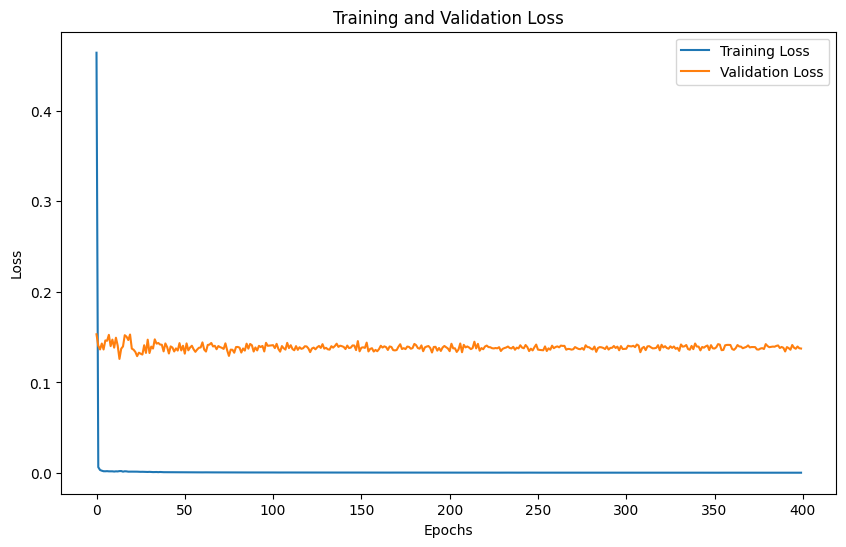

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import History
import matplotlib.pyplot as plt

# Define the neural network model
def create_model(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mse'])
    return model

# Prepare the data
X_train = df_train[all_feature_cols].values
y_train = df_train['t0s0'].values
X_test = df_test_preprocessed[all_feature_cols].values
y_test = df_test_preprocessed['t0s0'].values

# Create the model
model = create_model(X_train.shape[1])

# Train the model and store the training history
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=400, batch_size=32)

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [46]:
# Calculate RMSE
y_pred = model.predict(X_test)
RMSE_nn = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE Neural Network:', RMSE_nn)

247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step
RMSE Neural Network: 0.3706456680608082


# autogluon

In [3]:
#! pip install autogluon
from autogluon.tabular import TabularPredictor

x_train = pd.read_csv('./Xtrain.csv')
y_train = pd.read_csv('./Ytrain.csv')

x_test = pd.read_csv('./Xtest.csv')
y_sample = pd.read_csv('./Ysample.csv')

# Add t0s0 
x_train['t0s0'] = y_train['t0s0']
x_test['t0s0'] = y_sample['t0s0']

In [ ]:
predictor = TabularPredictor(label='t0s0').fit(train_data=x_train)
predictions = predictor.predict(x_test)

In [130]:
predictor = TabularPredictor.load("/media/arthur/HD/Users/arthu/projetos/machine-learning-for-networks/project/AutogluonModels/ag-20241211_012310")

predictor.evaluate(x_test)

{'root_mean_squared_error': -0.4197631785901537,
 'mean_squared_error': -0.1762011261001093,
 'mean_absolute_error': -0.3428852462157734,
 'r2': -1.1380229801971264,
 'pearsonr': -0.00034718306570084324,
 'median_absolute_error': -0.3042307014465332}

In [131]:
predictor.leaderboard(x_test)

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,KNeighborsDist,-0.402479,-0.065125,root_mean_squared_error,0.088340,0.026568,0.053639,0.088340,0.026568,0.053639,1,True,2
1,KNeighborsUnif,-0.402479,-0.083411,root_mean_squared_error,0.091594,0.026319,0.054304,0.091594,0.026319,0.054304,1,True,1
2,NeuralNetTorch,-0.413552,-0.022988,root_mean_squared_error,0.050451,0.015437,49.946575,0.050451,0.015437,49.946575,1,True,10
3,LightGBMXT,-0.419352,-0.015647,root_mean_squared_error,3.566449,0.697394,12.843390,3.566449,0.697394,12.843390,1,True,3
4,CatBoost,-0.419583,-0.015766,root_mean_squared_error,0.062144,0.008797,118.303798,0.062144,0.008797,118.303798,1,True,6
5,WeightedEnsemble_L2,-0.419763,-0.014675,root_mean_squared_error,5.353852,1.015203,194.265181,0.008684,0.000551,0.020796,2,True,12
6,LightGBM,-0.419978,-0.015889,root_mean_squared_error,0.726526,0.121344,5.247526,0.726526,0.121344,5.247526,1,True,4
7,XGBoost,-0.420019,-0.015648,root_mean_squared_error,0.319945,0.063056,6.720041,0.319945,0.063056,6.720041,1,True,9
8,ExtraTreesMSE,-0.420068,-0.016698,root_mean_squared_error,0.356590,0.100216,6.961895,0.356590,0.100216,6.961895,1,True,7
9,LightGBMLarge,-0.420126,-0.016041,root_mean_squared_error,0.919892,0.134956,9.404408,0.919892,0.134956,9.404408,1,True,11


In [9]:
df_test_preprocessed = preprocess_data(x_test, y_sample)
df_train_preprocessed = preprocess_data(x_train, y_train)

In [12]:
predictor = TabularPredictor(label='t0s0').fit(train_data=df_train_preprocessed)
predictions = predictor.predict(df_test_preprocessed)

No path specified. Models will be saved in: "AutogluonModels/ag-20241211_161227"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #49~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Wed Nov  6 17:42:15 UTC 2
CPU Count:          8
Memory Avail:       13.63 GB / 19.41 GB (70.2%)
Disk Space Avail:   835.31 GB / 930.26 GB (89.8%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in

[1000]	valid_set's rmse: 0.0165453
[2000]	valid_set's rmse: 0.0160131
[3000]	valid_set's rmse: 0.0158562
[4000]	valid_set's rmse: 0.0158162
[5000]	valid_set's rmse: 0.0158107
[6000]	valid_set's rmse: 0.0158042
[7000]	valid_set's rmse: 0.0157878
[8000]	valid_set's rmse: 0.0158066
[9000]	valid_set's rmse: 0.0158058


	-0.0158	 = Validation score   (-root_mean_squared_error)
	12.94s	 = Training   runtime
	0.68s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's rmse: 0.0159907
[2000]	valid_set's rmse: 0.0157882


	-0.0158	 = Validation score   (-root_mean_squared_error)
	4.73s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-0.0163	 = Validation score   (-root_mean_squared_error)
	31.79s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: CatBoost ...
	-0.0154	 = Validation score   (-root_mean_squared_error)
	79.98s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-0.016	 = Validation score   (-root_mean_squared_error)
	15.31s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-0.0163	 = Validation score   (-root_mean_squared_error)
	53.92s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: XGBoost ...
	-0.0155	 = Validation score   (-root_mean_squared_error)
	8.95s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-0.0191	 = Validation score   (-root_mean_squared_error)
	55.73s	 = Training   runtime
	0.02s	 = Validation ru

[1000]	valid_set's rmse: 0.0157198


	-0.0157	 = Validation score   (-root_mean_squared_error)
	7.5s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	Ensemble Weights: {'CatBoost': 0.263, 'NeuralNetFastAI': 0.263, 'XGBoost': 0.263, 'RandomForestMSE': 0.158, 'ExtraTreesMSE': 0.053}
	-0.0146	 = Validation score   (-root_mean_squared_error)
	0.02s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 275.2s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 6753.8 rows/s (2500 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/media/arthur/HD/Users/arthu/projetos/machine-learning-for-networks/project/AutogluonModels/ag-20241211_161227")


In [13]:
predictor.leaderboard(df_test_preprocessed)

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,KNeighborsUnif,-0.411658,-0.078444,root_mean_squared_error,0.132601,0.024563,0.062893,0.132601,0.024563,0.062893,1,True,1
1,KNeighborsDist,-0.411716,-0.063068,root_mean_squared_error,0.151916,0.014981,0.045250,0.151916,0.014981,0.045250,1,True,2
2,NeuralNetTorch,-0.417389,-0.019074,root_mean_squared_error,0.050180,0.015383,55.732796,0.050180,0.015383,55.732796,1,True,10
3,NeuralNetFastAI,-0.419894,-0.016251,root_mean_squared_error,0.269404,0.074030,53.918774,0.269404,0.074030,53.918774,1,True,8
4,ExtraTreesMSE,-0.420121,-0.015953,root_mean_squared_error,0.634571,0.100582,15.307039,0.634571,0.100582,15.307039,1,True,7
5,RandomForestMSE,-0.420380,-0.016335,root_mean_squared_error,0.821058,0.103388,31.786883,0.821058,0.103388,31.786883,1,True,5
6,WeightedEnsemble_L2,-0.420453,-0.014583,root_mean_squared_error,2.209878,0.370160,189.965324,0.007508,0.000606,0.021135,2,True,12
7,LightGBMXT,-0.420477,-0.015787,root_mean_squared_error,3.413312,0.675828,12.935828,3.413312,0.675828,12.935828,1,True,3
8,LightGBM,-0.420766,-0.015782,root_mean_squared_error,0.522667,0.109172,4.732346,0.522667,0.109172,4.732346,1,True,4
9,CatBoost,-0.420803,-0.015354,root_mean_squared_error,0.063236,0.010286,79.977634,0.063236,0.010286,79.977634,1,True,6
